In [1]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


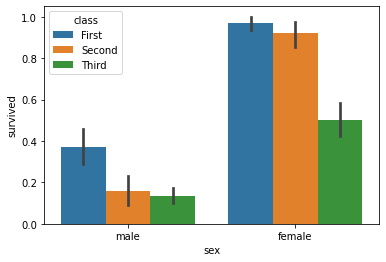

In [11]:
# 直接使用 PANDAS dataframe當作參數
# 條形圖() 顯示分類變數和連續變數之間的關係。數據以矩形條表示，其中條的長度表示該類別中數據的比例。


sns.barplot(x = "sex", y = "survived", hue = "class", data = df)
plt.show()

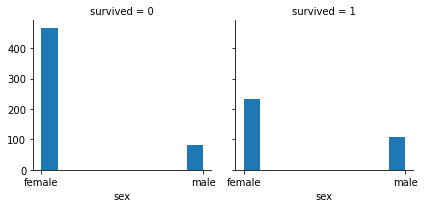

In [12]:
# 瞭解性別在各艙等的分布的存活率

g = sns.FacetGrid(df, col = "survived")
g.map(plt.hist,"sex")
plt.show()

<AxesSubplot:xlabel='pclass,sex'>

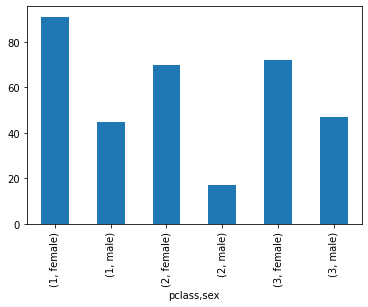

In [5]:
# 先檢視各艙位存活人數，使用 groupby函數進行分類
# 將 survived加總即為各艙等生存人數
df.groupby('pclass').survived.sum()

# 加上性別
survived = df.groupby(['pclass', 'sex']).survived.sum()
survived.plot(kind = 'bar')

In [6]:
survived_counts = pd.crosstab([df.pclass, df.sex], df.survived)
survived_counts
# 使用 pd.crosstab函數繪製交叉圖表，直觀的依據艙位等級及性別查看存活人數及死亡人數

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

<AxesSubplot:xlabel='pclass,sex'>

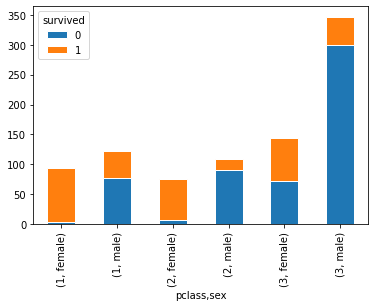

In [8]:
# 繪製堆疊條形圖，X軸代表依據艙等分成男性及女性，Y軸代表人數，藍色代表死亡人數，橘色代表存活人數
survived_counts.plot(kind = 'bar', stacked = True, edgecolor = 'white')

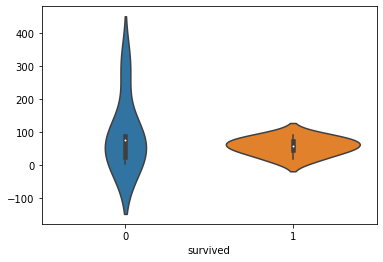

In [13]:
sns.violinplot(data = survived_counts)
plt.show()

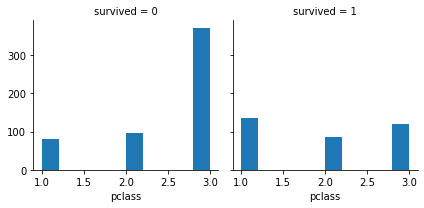

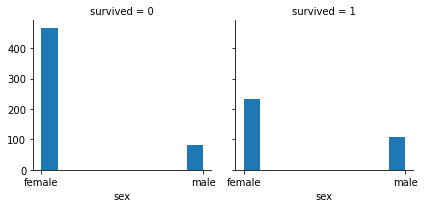

In [14]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df, col = 'survived')
g.map(plt.hist, 'pclass')
plt.show()
h = sns.FacetGrid(df, col = 'survived')
h.map(plt.hist, 'sex')
plt.show()

# PS：跟第一次做 Face.Grid有何不同？
# 針對的參數不同，其圖形呈現的特徵與解讀亦有差異